In [1]:
import wrangle as w
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution. 

In [2]:
df = w.wrangle_zillow()
    
df.head()   

,id,parcelid,bedrooms,bathrooms,sq_ft,fips,year_built,tax_amount,tax_value
0,20,11324547,4.0,2.0,3633.0,6037.0,2005.0,6941.39,296425.0
1,31,11544747,3.0,4.0,1620.0,6037.0,2011.0,10244.94,847770.0
2,33,11585547,3.0,2.0,2077.0,6037.0,1926.0,7924.68,646760.0
3,62,11954547,0.0,0.0,1200.0,6037.0,1972.0,91.60,5328.0
4,97,12537947,0.0,0.0,171.0,6037.0,1973.0,255.17,6920.0


In [3]:
df.isna().sum()

id            0
parcelid      0
bedrooms      0
bathrooms     0
sq_ft         0
fips          0
year_built    0
tax_amount    0
tax_value     0
dtype: int64

In [4]:
train, test = train_test_split(df, train_size = 0.7, random_state = 42)
validate, test = train_test_split(train, train_size = 0.5, random_state = 42)

train.shape, validate.shape ,test.shape

((1498164, 9), (749082, 9), (749082, 9))

In [5]:
mm_scaler = MinMaxScaler()

In [6]:
cols = ['bedrooms', 'bathrooms','sq_ft', 'tax_amount']

mm_scaler.fit(train[cols])

MinMaxScaler()

In [7]:
mm_cols = mm_scaler.transform(train[cols])

In [8]:
mm_df = pd.DataFrame(mm_cols, columns = cols)

mm_df.head()

,bedrooms,bathrooms,sq_ft,tax_amount
0,0.166667,0.06250,0.001523,0.002747
1,0.166667,0.06250,0.001324,0.002797
2,0.166667,0.03125,0.001518,0.004836
3,0.166667,0.06250,0.001472,0.002631
4,0.166667,0.06250,0.001527,0.004238


In [9]:
ss_scaler = StandardScaler()
ss_scaler.fit(train[cols])

StandardScaler()

In [10]:
ss_cols = ss_scaler.transform(train[cols])

ss_df = pd.DataFrame(ss_cols, columns = cols)
ss_df.head()

,bedrooms,bathrooms,sq_ft,tax_amount
0,-0.322789,-0.242288,-0.312671,-0.336199
1,-0.322789,-0.242288,-0.457211,-0.329269
2,-0.322789,-1.252068,-0.316475,-0.049422
3,-0.322789,-0.242288,-0.349947,-0.352142
4,-0.322789,-0.242288,-0.309628,-0.131460


In [11]:
rs_scaler = RobustScaler()
rs_scaler.fit(train[cols])

RobustScaler()

In [12]:
rs_cols = rs_scaler.transform(train[cols])

In [13]:
rs_df = pd.DataFrame(rs_cols, columns = cols)
rs_df.head()

,bedrooms,bathrooms,sq_ft,tax_amount
0,0.0,0.0,-0.179811,-0.293396
1,0.0,0.0,-0.379600,-0.279326
2,0.0,-1.0,-0.185068,0.288922
3,0.0,0.0,-0.231335,-0.325769
4,0.0,0.0,-0.175605,0.122338


In [14]:
def compare_plots(transformed_data, original_data = train[cols]):
    for i in cols:
        print(i)
        plt.subplot(121)
        plt.hist(original_data[i], bins = 25, ec = 'black', color = 'green')
        plt.title('Original Data')

        plt.subplot(122)
        plt.hist(transformed_data[i], bins = 25, ec = 'black', color = 'dodgerblue')
        plt.title('Transformed Data')

        plt.show()

bedrooms


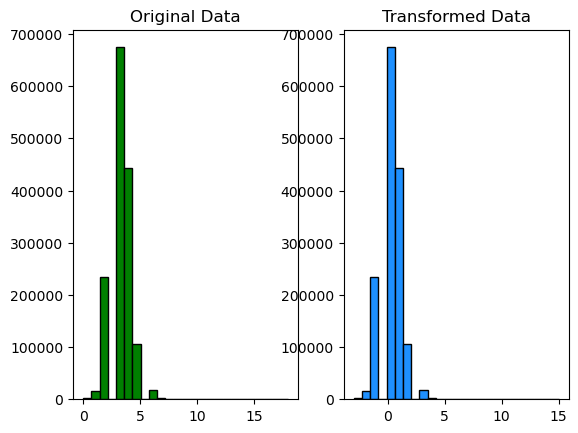

bathrooms


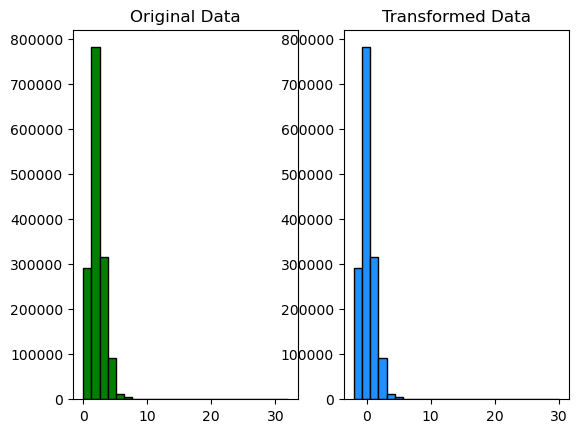

sq_ft


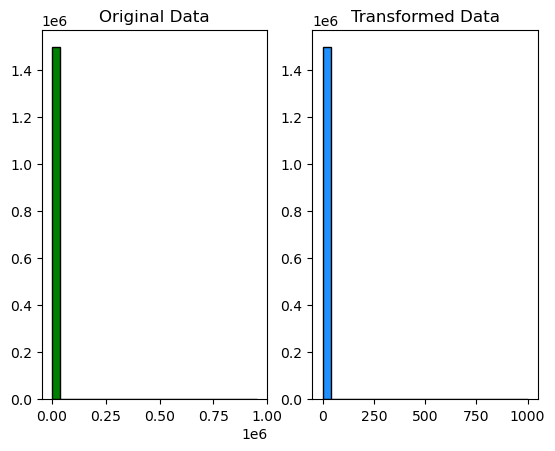

tax_amount


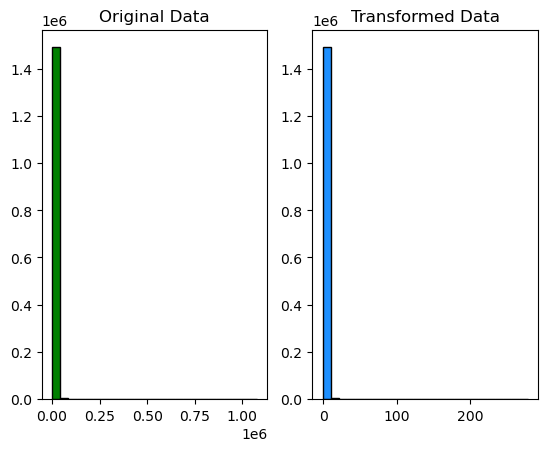

In [15]:
compare_plots(rs_df)

bedrooms


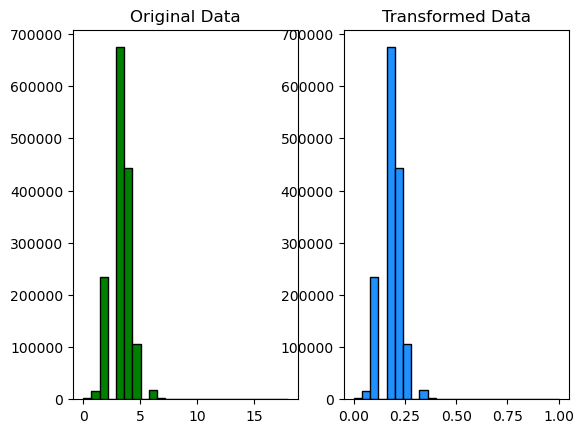

bathrooms


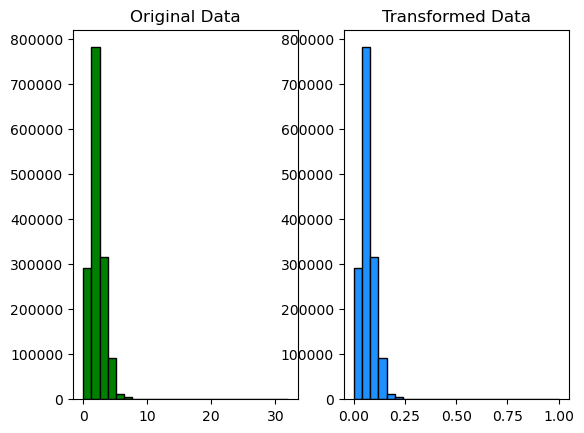

sq_ft


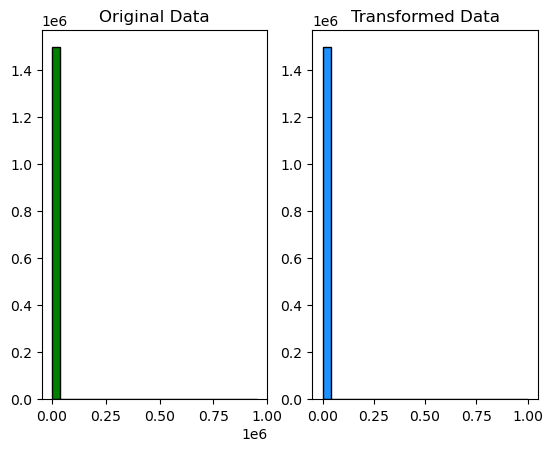

tax_amount


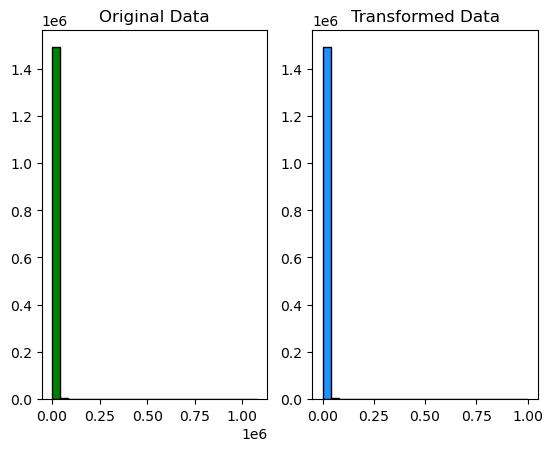

In [16]:
compare_plots(mm_df)

bedrooms


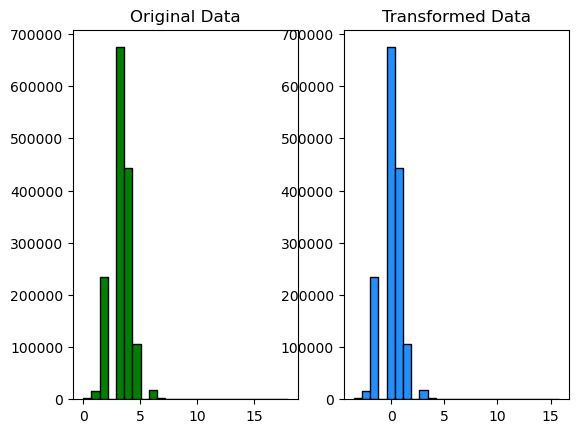

bathrooms


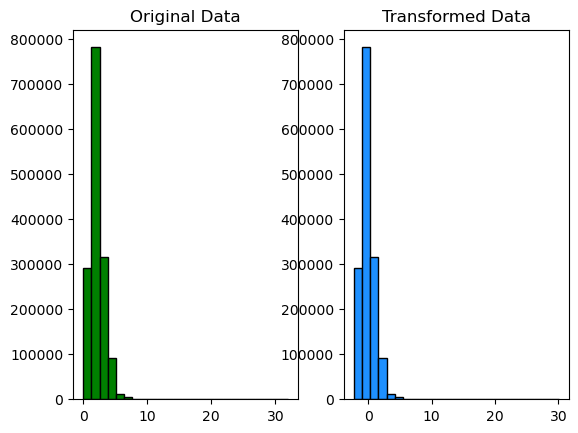

sq_ft


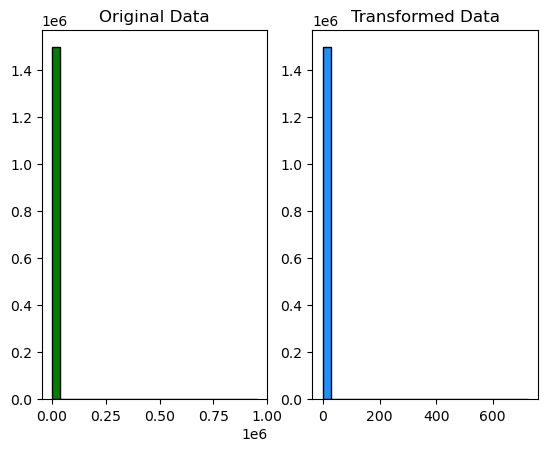

tax_amount


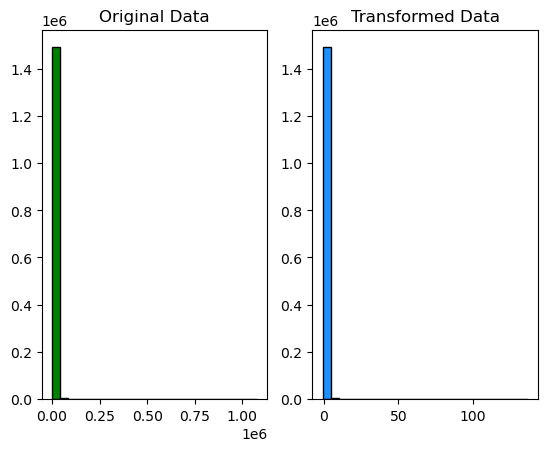

In [17]:
compare_plots(ss_df)

### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?<br>

In [18]:
mm_df.head()

,bedrooms,bathrooms,sq_ft,tax_amount
0,0.166667,0.06250,0.001523,0.002747
1,0.166667,0.06250,0.001324,0.002797
2,0.166667,0.03125,0.001518,0.004836
3,0.166667,0.06250,0.001472,0.002631
4,0.166667,0.06250,0.001527,0.004238


In [19]:
inv_mm_df = pd.DataFrame(mm_scaler.inverse_transform(mm_cols), columns = [cols])

inv_mm_df.head()

,bedrooms,bathrooms,sq_ft,tax_amount
0,3.0,2.0,1452.0,2974.81
1,3.0,2.0,1262.0,3029.22
2,3.0,1.0,1447.0,5226.67
3,3.0,2.0,1403.0,2849.62
4,3.0,2.0,1456.0,4582.48


### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.<br>

In [20]:
qt_scaler_norm = QuantileTransformer(output_distribution = 'normal')
qt_scaler_norm

QuantileTransformer(output_distribution='normal')

In [21]:
qt_df_norm = pd.DataFrame(qt_scaler_norm.fit_transform(train[cols]), columns = [cols])
qt_df_norm.head()

,bedrooms,bathrooms,sq_ft,tax_amount
0,-0.263985,-0.184203,-0.280911,-0.465222
1,-0.263985,-0.184203,-0.658043,-0.440730
2,-0.263985,-1.295363,-0.291715,0.362328
3,-0.263985,-0.184203,-0.372246,-0.526174
4,-0.263985,-0.184203,-0.275694,0.159540


bedrooms


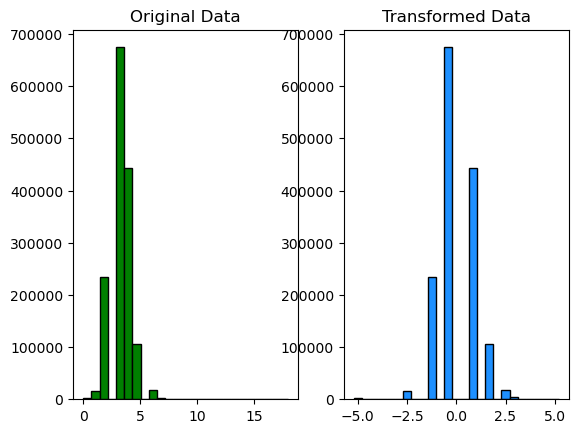

bathrooms


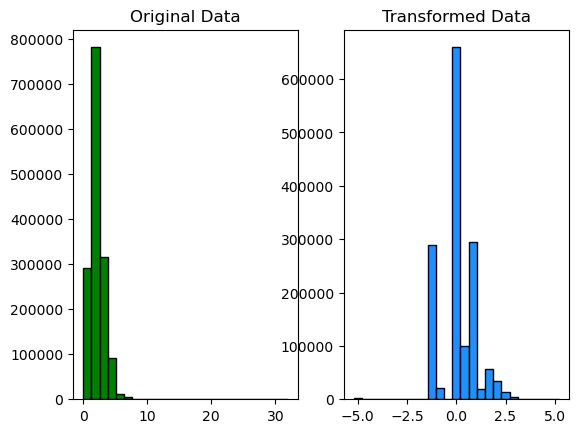

sq_ft


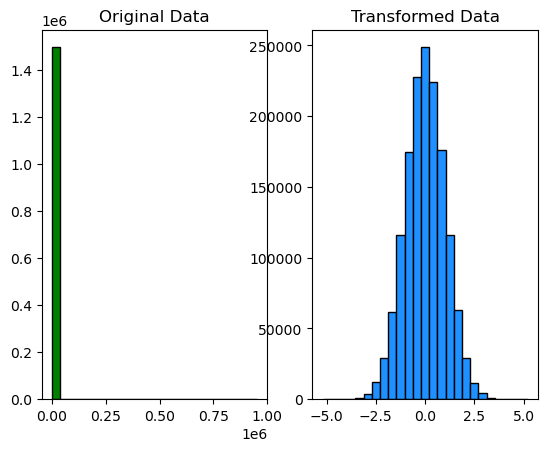

tax_amount


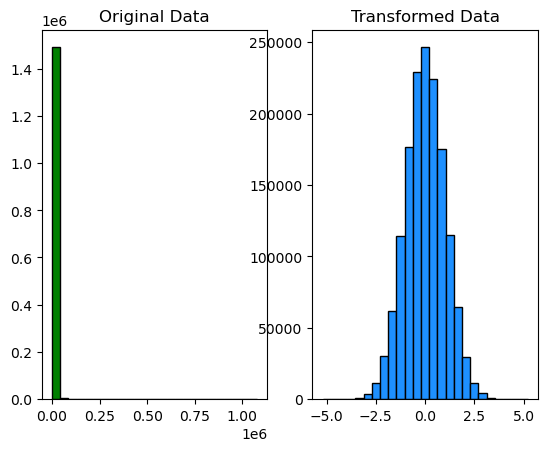

In [22]:
compare_plots(qt_df_norm)

### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?<br>

In [23]:
qt_scaler = QuantileTransformer()
qt_scaler

QuantileTransformer()

In [24]:
qt_df = pd.DataFrame(qt_scaler.fit_transform(train[cols]), columns = [cols])
qt_df.head()

,bedrooms,bathrooms,sq_ft,tax_amount
0,0.392893,0.428929,0.387387,0.323376
1,0.392893,0.428929,0.253754,0.332183
2,0.392893,0.097598,0.383884,0.644692
3,0.392893,0.428929,0.352853,0.302750
4,0.392893,0.428929,0.389389,0.567581


bedrooms


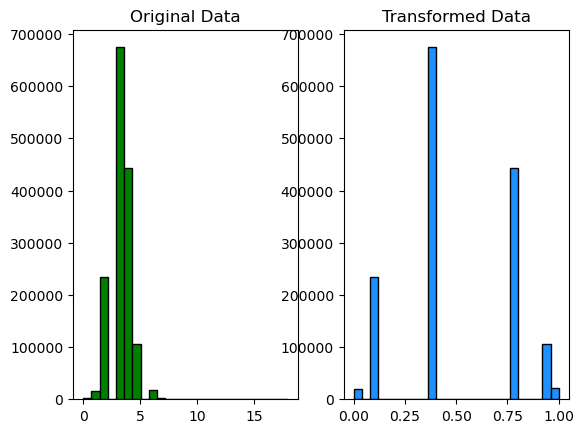

bathrooms


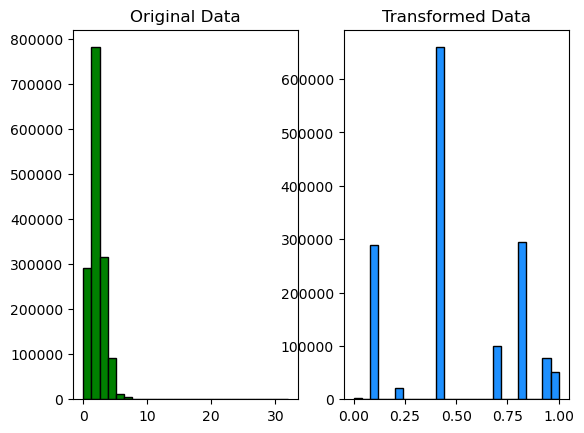

sq_ft


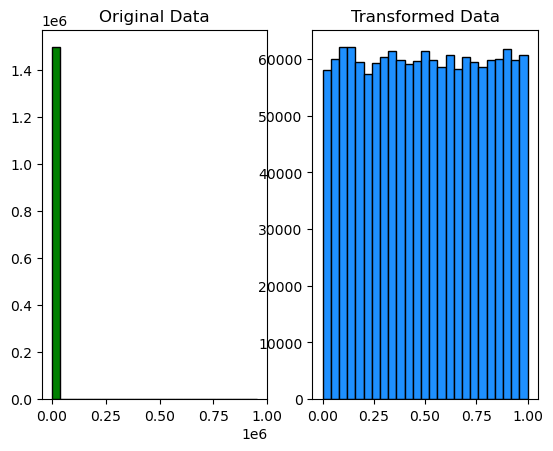

tax_amount


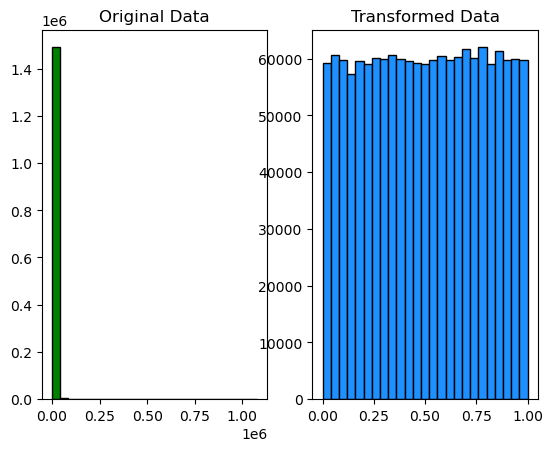

In [25]:
compare_plots(qt_df)

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [36]:
def scaled_data(train, 
               validate, 
               test, 
               columns_to_scale=['bedrooms', 'bathrooms', 'sq_ft', 'tax_amount'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies of our original data so we dont gronk up anything
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #     make the thing
    scaler = StandardScaler()
    #     fit the thing
    scaler.fit(train[columns_to_scale])
    # applying the scaler:
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [38]:
scaler, train_scaled, validate_scaled, test_scaled = scaled_data(train, validate, test, return_scaler=True)


In [39]:
train_scaled.head()

,id,parcelid,bedrooms,bathrooms,sq_ft,fips,year_built,tax_amount,tax_value
1001601,1395421,12628568,-0.322789,-0.242288,-0.312671,6037.0,1980.0,-0.336199,241012.0
611989,852722,11035631,-0.322789,-0.242288,-0.457211,6037.0,1953.0,-0.329269,235630.0
658616,917433,12494796,-0.322789,-1.252068,-0.316475,6037.0,1947.0,-0.049422,435123.0
835115,1163739,17113683,-0.322789,-0.242288,-0.349947,6111.0,1965.0,-0.352142,268770.0
242295,337445,12893862,-0.322789,-0.242288,-0.309628,6037.0,1961.0,-0.131460,365000.0


In [29]:
out_df = df[['bedrooms', 'bathrooms', 'sq_ft', 'tax_amount']]

out_df

,bedrooms,bathrooms,sq_ft,tax_amount
0,4.0,2.0,3633.0,6941.39
1,3.0,4.0,1620.0,10244.94
2,3.0,2.0,2077.0,7924.68
3,0.0,0.0,1200.0,91.60
4,0.0,0.0,171.0,255.17
...,...,...,...,...
2140230,4.0,4.0,4375.0,13877.56
2140231,4.0,3.0,2262.0,13494.52
2140232,4.0,4.5,3127.0,6244.16
2140233,3.0,2.5,1974.0,5302.70


In [30]:
q1, q3 = out_df.quantile([0.25, 0.75]).values
q1, q3

filtered_df = out_df[(out_df >= q1) & (out_df <= q3)]

filtered_df


,bedrooms,bathrooms,sq_ft,tax_amount
0,4.0,2.0,NaN,NaN
1,3.0,NaN,1620.0,NaN
2,3.0,2.0,2077.0,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
2140230,4.0,NaN,NaN,NaN
2140231,4.0,3.0,NaN,NaN
2140232,4.0,NaN,NaN,6244.16
2140233,3.0,2.5,1974.0,5302.70


In [31]:
filtered_df.isna().sum()

bedrooms       543683
bathrooms      632547
sq_ft         1069780
tax_amount    1070114
dtype: int64

In [32]:
out_df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,2140235.0,3.301419,0.932600,0.00,3.00,3.00,4.00,25.00
bathrooms,2140235.0,2.240352,0.990549,0.00,2.00,2.00,3.00,32.00
sq_ft,2140235.0,1863.193970,1221.754161,1.00,1258.00,1623.00,2208.00,952576.00
tax_amount,2140235.0,5616.711322,7814.562798,6.34,2540.85,4111.47,6411.93,1078101.87


In [33]:
df.head()

,id,parcelid,bedrooms,bathrooms,sq_ft,fips,year_built,tax_amount,tax_value
0,20,11324547,4.0,2.0,3633.0,6037.0,2005.0,6941.39,296425.0
1,31,11544747,3.0,4.0,1620.0,6037.0,2011.0,10244.94,847770.0
2,33,11585547,3.0,2.0,2077.0,6037.0,1926.0,7924.68,646760.0
3,62,11954547,0.0,0.0,1200.0,6037.0,1972.0,91.60,5328.0
4,97,12537947,0.0,0.0,171.0,6037.0,1973.0,255.17,6920.0
